In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


C:\Users\22177\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\22177\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\22177\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
data= pd.read_csv('Telecom-Data-1.csv',sep=';')

In [5]:
data.head()

,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation electronique,Mode de paiement,charges mensuelles,Charges totales,Desabonnement
0,1,Femme,0,Non,1,Non,DSL,Non,Oui,Mensuel,Oui,Cheque electronique,"29,85","29,85",Non
1,2,Homme,0,Non,34,Non,DSL,Oui,Non,Annuel,Non,Cheque papier,"56,95","1889,5",Non
2,3,Homme,0,Non,2,Non,DSL,Oui,Non,Mensuel,Oui,Cheque papier,"53,85","108,15",Oui
3,4,Homme,0,Non,45,Non,DSL,Non,Non,Annuel,Non,Virement bancaire,"42,3","1840,75",Non
4,5,Femme,0,Non,2,Non,Fibre optique,Oui,Non,Mensuel,Oui,Cheque electronique,"70,7","151,65",Oui


## Base de données
Cette base de données est disponible sur le site [Management&DataScience](https://management-datascience.org/projects/29772/?cookie-state-change=1719746415153).

## Contenu de la base de données

Ce projet comporte une base de données qui contient 15 variables et chaque variable est décrit comme suit:

- 'ID' :c'est l'identification du client et ca lui porte unique,
- 'Genre' :Il s'identifie le sexe du client.
- 'Senior' : indique si le client a 65 ans ou plus : Oui, Non
- 'Enfant': indique si le client a des enfants à charge.
- 'Ancienneté' : depuis combien de temps (en mois) il est client
- 'lignes multiples' : si le client a plusieurs lignes ou non
- 'services internet' : type de fourniture d’accès Internet du client (DSL, Fibre optique, Non).
- 'Autre service' : si le client dispose ou non d’une sécurité en ligne.
- 'Partenaire' : si le client a un partenaire.
- 'type de contrat',
- 'mode de paiement',
- 'facturation sans papier',
- 'frais mensuels',
- 'frais totaux'.

## Objectif du projet
l'objectif de ce projet est de construire un model de machine learning qui prédit, si un client se désabonne d'un fournisseur d'acces à l'internet ou pas, en fonction de ces caracterisques. cette base de données sera divisée à un ensemble d'apprentissage et de test pour entrainer et évaluer la performance du model. 

In [6]:
# afficher les information du base du données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        5986 non-null   int64 
 1   Genre                     5986 non-null   object
 2   Senior                    5986 non-null   int64 
 3   Enfants                   5986 non-null   object
 4   Anciennete                5986 non-null   int64 
 5   Multi-lignes              5986 non-null   object
 6   Service Internet          5986 non-null   object
 7   Autres Services           5986 non-null   object
 8   Partenaire                5986 non-null   object
 9   Contrat                   5986 non-null   object
 10  Facturation electronique  5986 non-null   object
 11  Mode de paiement          5986 non-null   object
 12  charges mensuelles        5985 non-null   object
 13  Charges totales           5975 non-null   object
 14  Desabonnement           

In [12]:
# Calcul le nombre valeurs manquantent
data.isnull().sum()

ID                          0
Genre                       0
Senior                      0
Enfants                     0
Anciennete                  0
Multi-lignes                0
Service Internet            0
Autres Services             0
Partenaire                  0
Contrat                     0
Facturation electronique    0
Mode de paiement            0
charges mensuelles          0
Charges totales             0
Desabonnement               0
dtype: int64

In [11]:
# Remplacer les valeurs nulles par les modes des colonnes catégorielles
for column in data.select_dtypes(include=['object', 'category']).columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)


C:\Users\22177\AppData\Local\Temp\ipykernel_4440\435086353.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


In [13]:
# convertion de la variabe totalcharges en numérique
data['Charges totales'] = pd.to_numeric(data['Charges totales'], errors='coerce')
data['charges mensuelles'] = pd.to_numeric(data['charges mensuelles'], errors='coerce')


In [15]:
# Analyse descriptive des variables numérique
data.describe()

,ID,Senior,Anciennete,charges mensuelles,Charges totales
count,5986.000000,5986.000000,5986.000000,344.000000,285.000000
mean,3516.183094,0.162546,32.481791,66.436047,2343.719298
std,2032.026181,0.368982,24.638643,28.838678,2259.198130
min,1.000000,0.000000,0.000000,19.000000,19.000000
25%,1759.250000,0.000000,9.000000,45.000000,454.000000
50%,3513.500000,0.000000,29.000000,73.500000,1388.000000
75%,5275.750000,0.000000,56.000000,91.000000,3848.000000
max,7042.000000,1.000000,72.000000,116.000000,8405.000000


In [17]:
# Analyse descriptive des variables catégorielles
data.describe(include=['object', 'category'])

,Genre,Enfants,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation electronique,Mode de paiement,Desabonnement
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,3,3,2,2,3,2,4,2
top,Homme,Non,Non,Fibre optique,Oui,Non,Mensuel,Oui,Cheque electronique,Non
freq,3032,4196,3463,2636,5435,3093,3262,3521,2005,4424


## Analyse univarivé

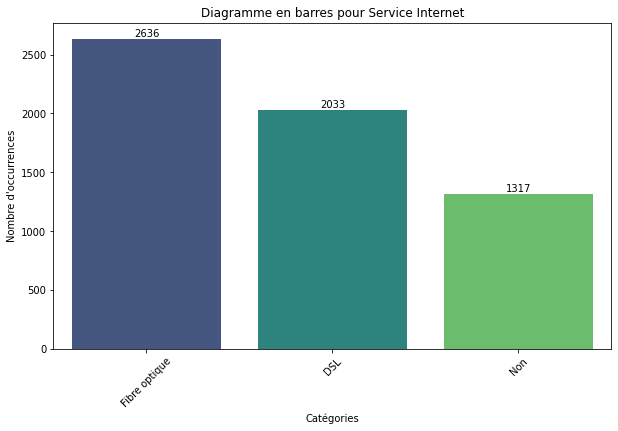

In [152]:
variable_categorielle='Service Internet'
category_counts = data[variable_categorielle].value_counts()

# Tracer le diagramme en barres

plt.figure(figsize=(10, 6))
ax=sn.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title(f'Diagramme en barres pour {variable_categorielle}')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

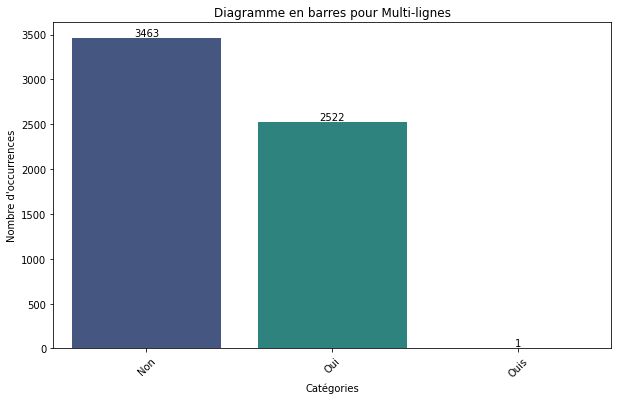

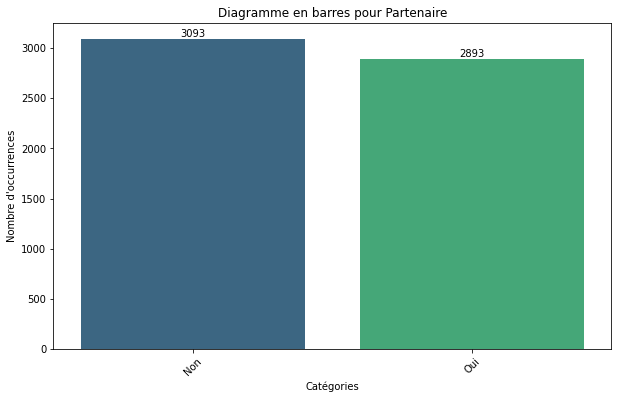

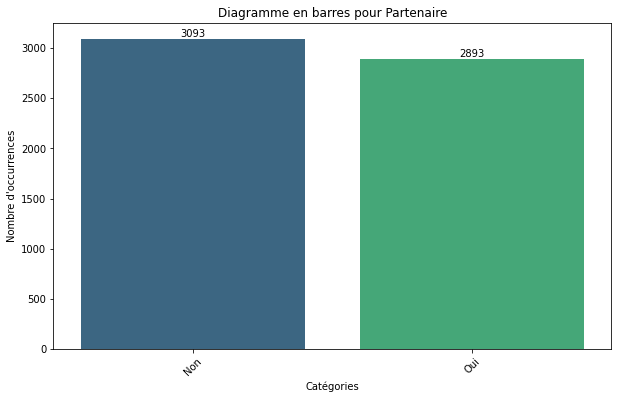

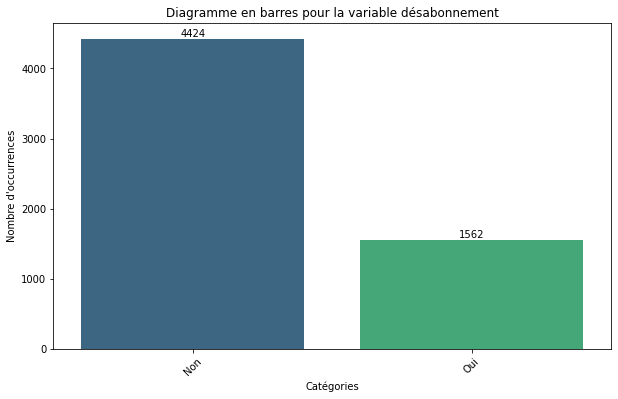

In [166]:
variable_categorielle='Multi-lignes'
category_counts = data[variable_categorielle].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
ax=sn.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title(f'Diagramme en barres pour {variable_categorielle}')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

variable_categorielle='Partenaire'
category_counts = data[variable_categorielle].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
ax=sn.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title(f'Diagramme en barres pour {variable_categorielle}')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

variable_categorielle='Partenaire'
category_counts = data[variable_categorielle].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
ax=sn.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title(f'Diagramme en barres pour {variable_categorielle}')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()


category_counts = data['Desabonnement'].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
ax=sn.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title(f'Diagramme en barres pour la variable désabonnement')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

In [47]:
# calcul du porcentage du taux de désabonnement
data.groupby('Desabonnement')['Desabonnement'].value_counts()/5986*100

Desabonnement
Non    73.90578
Oui    26.09422
Name: count, dtype: float64

Sur l'ensemble des clients, nous avons 1562 clients qui sont désabonnés, soit un taux de 26%

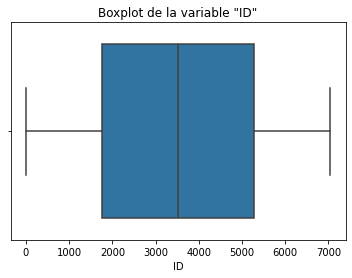

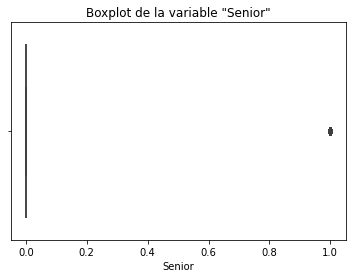

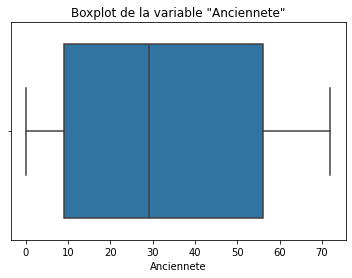

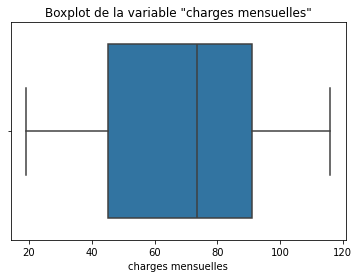

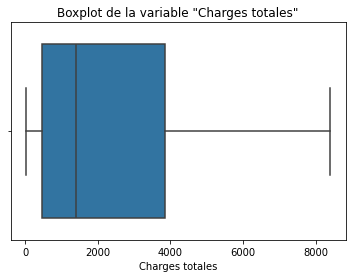

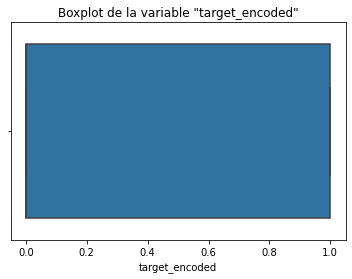

In [125]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in var_num:
    sn.boxplot(x=data[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

Sur les variables numérique, nous observons qu'une seul valeur abérante au niveau de la variable sénior

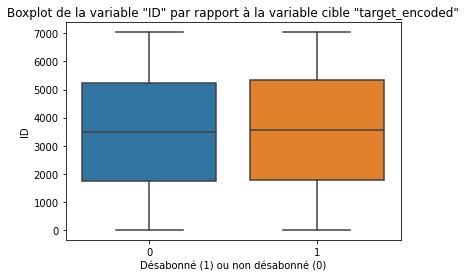

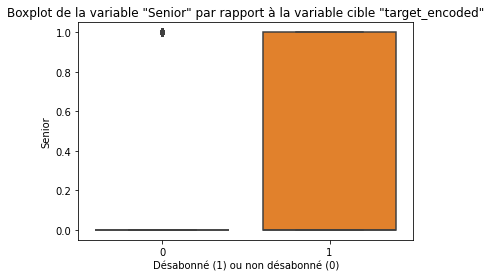

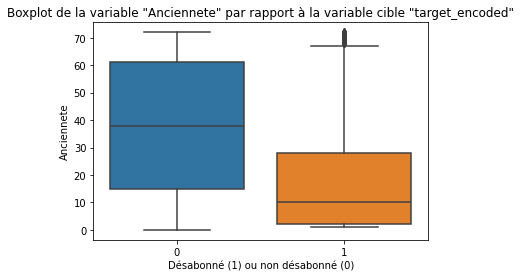

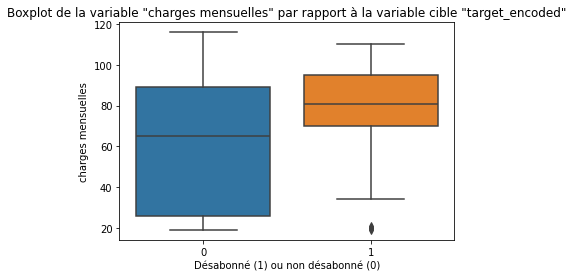

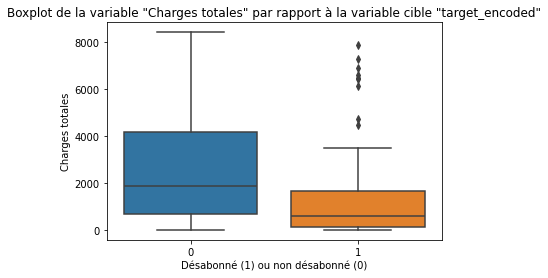

In [142]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in var_num.drop('target_encoded',axis=1):
    sn.boxplot(data=data, x='target_encoded', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "target_encoded"')
    plt.xlabel('Désabonné (1) ou non désabonné (0)')
    plt.ylabel(col)
    plt.show()

AttributeError: 'GrouperView' object has no attribute 'join'

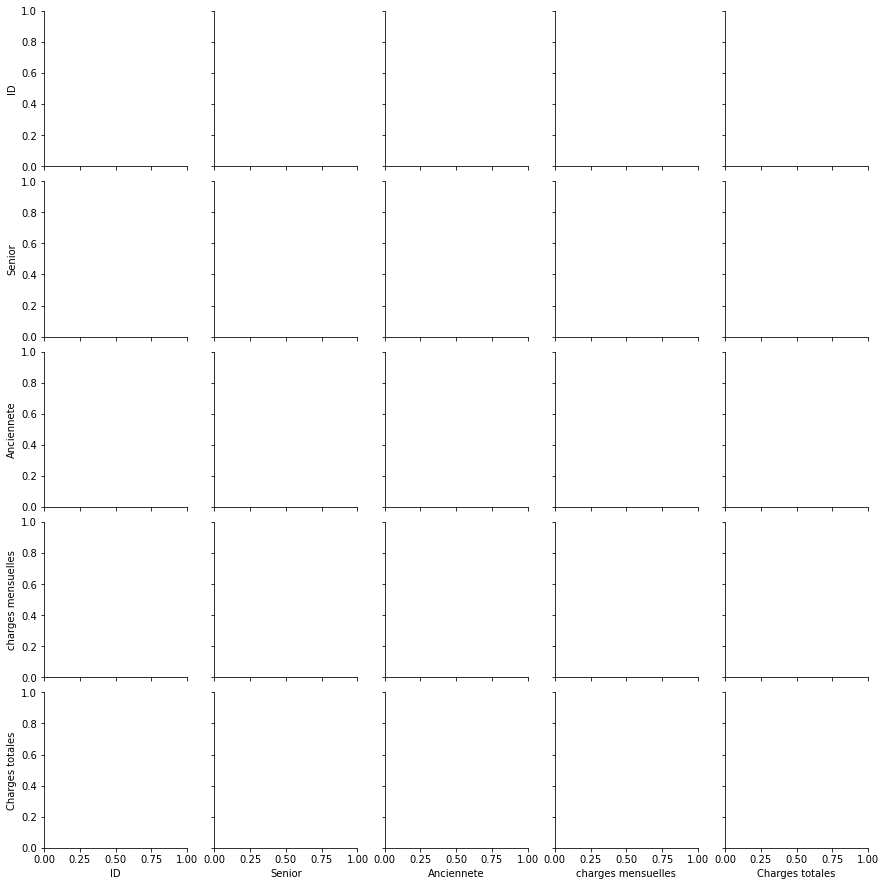

In [135]:
# Génération du pairplot
sn.pairplot(data=var_num, hue='target_encoded', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

In [35]:
var_cat = data.select_dtypes(include=['object', 'category'])

Etude de correlation entre les variables catégorielles et la variable cible

In [22]:
from scipy.stats import chi2_contingency

# Définir une fonction pour effectuer le test du Chi-carré
def chi2_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Appliquer le test du Chi-carré à chaque variable catégorielle par rapport à la variable cible
target_var = 'Desabonnement'
categorical_vars = var_cat.drop('Desabonnement',axis=1)

results = {}
for var in categorical_vars:
    chi2, p = chi2_test(data, target_var, var)
    results[var] = {'chi2': chi2, 'p-value': p}

results_df = pd.DataFrame(results).T

In [23]:
results_df

,chi2,p-value
Genre,0.009743,9.213698e-01
Enfants,150.110098,1.640193e-34
Multi-lignes,11.814753,2.719312e-03
Service Internet,620.510657,1.810601e-135
Autres Services,1.827694,1.764002e-01
Partenaire,143.519931,4.524306e-33
Contrat,1002.234013,2.331575e-218
Facturation electronique,214.179998,1.682482e-48
Mode de paiement,555.515551,4.429948e-120


les variables Enfants, Multi-lignes, Service Internet, Partenaire, Contrat, Facturation electronique et Mode de paiement leurs p-value sont < 0.05, donc ils ont une relation significative avec la variable cible. Pour les autres, leurs p-values sont > 0.05, leurs relation avec la variable cible n'est pas significative. donc ces deux variables ne font aucune n'effet sur la creation du model 

In [24]:
var_num = data.select_dtypes(include=['int', 'float'])

Etude de corrélation entre les variables numériques et la variable cible

In [31]:
# convertissons la variabe cible en numérique
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
data['target_encoded'] = label_encoder.fit_transform(data['Desabonnement'])

In [32]:
var_num = data.select_dtypes(include=['int', 'float'])

In [33]:
# Calculer la corrélation de Pearson
corr = var_num.corr()
print("Corrélation de Pearson:")
print(corr['target_encoded'])

Corrélation de Pearson:
ID                    0.007272
Senior                0.150641
Anciennete           -0.351829
charges mensuelles    0.250719
Charges totales      -0.203149
target_encoded        1.000000
Name: target_encoded, dtype: float64


Les variables Senior et charges mensuelles ont une corrélation positive, tandisque les variables Anciennete et charges totales ont une corréltion négative avec la variable cible

In [37]:
# Créer un encodage de label pour chaque colonne catégorielle
label_encoders = {}
for column in var_cat.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    var_cat[column] = label_encoders[column].fit_transform(var_cat[column])



In [150]:
# concaténer var_cat et var_num
df = pd.concat([var_num,var_cat], axis=1)


In [39]:
# Calculer la corrélation de Pearson
corr = df.corr()
print("Corrélation de Pearson:")
print(corr['target_encoded'])

Corrélation de Pearson:
ID                          0.007272
Senior                      0.150641
Anciennete                 -0.351829
charges mensuelles          0.250719
Charges totales            -0.203149
target_encoded              1.000000
Genre                      -0.001656
Enfants                    -0.158772
Multi-lignes                0.043403
Service Internet           -0.050568
Autres Services             0.018132
Partenaire                 -0.155222
Contrat                     0.339478
Facturation electronique    0.189543
Mode de paiement           -0.077527
Desabonnement               1.000000
Name: target_encoded, dtype: float64


# Création d'un model de prédiction

In [167]:
X=df.drop(['Desabonnement','target_encoded'],axis=1)
Y=df['target_encoded']

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer

In [168]:
# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

#division des données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
# Initialiser les modèles avec des hyperparamètres de base
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionnaire pour stocker les performances des modèles
model_performance = {}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Évaluation du modèle
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Enregistrer les performances
    model_performance[name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Trouver le meilleur modèle basé sur l'accuracy
best_model_name = max(model_performance, key=lambda k: model_performance[k]['Accuracy'])
best_model_performance = model_performance[best_model_name]

print(f"Le modèle le plus performant est: {best_model_name} avec une précision de {best_model_performance['Accuracy']}")
print("Rapport de classification du meilleur modèle:")
print(best_model_performance['Classification Report'])


Le modèle le plus performant est: Gradient Boosting avec une précision de 0.8105175292153589
Rapport de classification du meilleur modèle:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       893
           1       0.65      0.54      0.59       305

    accuracy                           0.81      1198
   macro avg       0.75      0.72      0.73      1198
weighted avg       0.80      0.81      0.80      1198



Sur les différents model que nous avons testé, le model Gradient Boosting est plus performant avec une précision de 81%. Donc nous allons continuer notre travail avec ce model

In [170]:
# Initialiser et entraîner le modèle de GradientBoostingClassifier
logreg = GradientBoostingClassifier()
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]



In [171]:
# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC: {roc_auc}")



Accuracy: 0.8105175292153589
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       893
           1       0.65      0.54      0.59       305

    accuracy                           0.81      1198
   macro avg       0.75      0.72      0.73      1198
weighted avg       0.80      0.81      0.80      1198

Confusion Matrix:
[[806  87]
 [140 165]]
AUC: 0.83183962697116


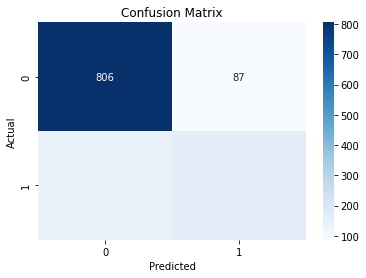

In [172]:
# Afficher la matrice de confusion
sn.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



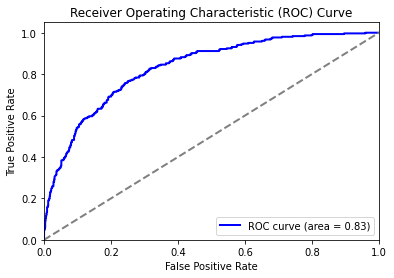

In [63]:
# Afficher la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [68]:
# Obtenir les Coefficients des caractéristiques
feature_importances = logreg.feature_importances_

# Créer un DataFrame pour afficher les importances des caractéristiques
features = df.drop(['Desabonnement', 'target_encoded'], axis=1).columns
Coefficient_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': feature_importances
})

# Trier les caractéristiques par importance décroissante
Coefficient_df = Coefficient_df.sort_values(by='Coefficient', ascending=False)

# Afficher les Coefficients des caractéristiques
print("Coefficients des caractéristiques du modèle Gradient Boosting:")
print(Coefficient_df)


Coefficients des caractéristiques du modèle Gradient Boosting:
                     Feature  Coefficient
11                   Contrat     0.470509
8           Service Internet     0.185081
2                 Anciennete     0.171800
0                         ID     0.049108
12  Facturation electronique     0.035121
13          Mode de paiement     0.022819
3         charges mensuelles     0.017573
1                     Senior     0.015290
4            Charges totales     0.014067
7               Multi-lignes     0.010882
9            Autres Services     0.004679
6                    Enfants     0.001516
5                      Genre     0.000840
10                Partenaire     0.000716


Les caractéristiques les plus influentes dans le modèle de Gradient Boosting sont le type de contrat, la disponibilité du service Internet et l'ancienneté du client. D'autres caractéristiques comme la facturation électronique, le mode de paiement et les charges mensuelles ont une importance moindre mais notable. Les caractéristiques comme le genre, la présence d'enfants et le fait d'avoir un partenaire ont un impact très faible sur les prédictions du modèle.

Cette analyse permet de mieux comprendre quelles caractéristiques sont les plus déterminantes pour la prédiction du désabonnement, ce qui peut guider des actions pour réduire le churn (taux de désabonnement) en se concentrant sur les facteurs les plus influents.

# Test d'évaluation

In [79]:
df1= pd.read_csv('Telecom-Evaluation.csv',sep=';')

In [82]:
X1=df1.drop('Desabonnement',axis=1)

In [83]:
# Créer un encodage de label pour chaque colonne catégorielle
label_encoders = {}
for column in X1.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X1[column] = label_encoders[column].fit_transform(X1[column])



In [88]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ID                        1057 non-null   int64
 1   Genre                     1057 non-null   int32
 2   Senior                    1057 non-null   int64
 3   Enfants                   1057 non-null   int32
 4   Anciennete                1057 non-null   int64
 5   Multi-lignes              1057 non-null   int32
 6   Service Internet          1057 non-null   int32
 7   Autres Services           1057 non-null   int32
 8   Contrat                   1057 non-null   int32
 9   Facturation electronique  1057 non-null   int32
 10  Partenaire                1057 non-null   int32
 11  Mode de paiement          1057 non-null   int32
 12  charges mensuelles        1057 non-null   int32
 13  Charges totales           1057 non-null   int32
dtypes: int32(11), int64(3)
memory usage: 70.

In [93]:
pred=logreg.predict(X1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [95]:
pred=pd.DataFrame(pred)

In [97]:
eval= pd.concat([df1,pred],axis=1)

In [100]:
eval['Desabonne']=eval[0]

In [103]:
eval=eval.drop(['Desabonnement',0],axis=1)

In [110]:
# Conversion des valeurs 0 et 1 en 'non' et 'oui' respectivement
eval = eval.replace({'Desabonne':{0: 'non', 1: 'oui'}})


In [147]:
eval

,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Contrat,Facturation electronique,Partenaire,Mode de paiement,charges mensuelles,Charges totales,Desabonne
0,8,Femme,0,Non,10,Non,DSL,Non,Mensuel,Non,Non,Cheque papier,"29,75","301,9",non
1,9,Femme,0,Non,28,Oui,Fibre optique,Oui,Mensuel,Oui,Oui,Cheque electronique,"104,8","3046,05",non
2,25,Homme,0,Oui,49,Non,DSL,Oui,Mensuel,Non,Oui,Carte bancaire,"59,6","2970,3",oui
3,27,Homme,0,Oui,47,Oui,Fibre optique,Oui,Mensuel,Oui,Oui,Cheque electronique,"99,35","4749,15",non
4,48,Femme,0,Non,2,Non,Fibre optique,Oui,Mensuel,Oui,Non,Cheque electronique,"80,65","144,15",non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,7027,Femme,0,Non,9,Non,DSL,Oui,Mensuel,Oui,Non,Virement bancaire,"44,2","403,35",non
1053,7032,Homme,1,Non,55,Oui,DSL,Oui,Annuel,Non,Oui,Carte bancaire,60,"3316,1",oui
1054,7037,Femme,0,Non,12,Non,DSL,Non,Annuel,Non,Non,Cheque electronique,"60,65","743,3",oui
1055,7040,Femme,0,Oui,72,Oui,Fibre optique,Oui,Annuel,Oui,Oui,Carte bancaire,"103,2","7362,9",oui


Apres l'évaluation du test  sur une nouvelle base de donnée, nous obtenons ce resultat

In [112]:
# enregistrement dans un fichier excel
eval.to_excel('C:/Users/22177/Documents/Management_datascience/prevision.xlsx')

C:\Users\22177\AppData\Local\Temp\ipykernel_4440\726532857.py:2: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  eval.to_excel('C:/Users/22177/Documents/Management_datascience/prevision.xlsx')


On apporter une solution sur le désabonnement des clients, on se focalise sur les variables (type de contrat, la disponibilité de l'internet et l'ancienneté)

In [145]:
#afficher les client qui se désabonne
eval_loc = eval.loc[eval['Desabonne'] == 'oui']

In [146]:
eval_loc

,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Contrat,Facturation electronique,Partenaire,Mode de paiement,charges mensuelles,Charges totales,Desabonne
2,25,Homme,0,Oui,49,Non,DSL,Oui,Mensuel,Non,Oui,Carte bancaire,"59,6","2970,3",oui
16,141,Femme,1,Oui,72,Oui,DSL,Oui,Bisannuel,Oui,Oui,Carte bancaire,"88,05","6425,65",oui
17,144,Homme,0,Non,64,Oui,Fibre optique,Oui,Annuel,Oui,Non,Carte bancaire,"84,3","5289,05",oui
37,243,Femme,0,Oui,41,Non,DSL,Oui,Annuel,Oui,Oui,Carte bancaire,"74,7","3187,65",oui
57,380,Homme,0,Non,17,Oui,Fibre optique,Oui,Annuel,Non,Non,Cheque electronique,"86,75","1410,25",oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,6986,Homme,0,Oui,37,Non,DSL,Non,Annuel,Oui,Oui,Cheque electronique,"40,2","1525,35",oui
1047,6990,Femme,0,Oui,20,Oui,DSL,Oui,Annuel,Non,Oui,Virement bancaire,76,"1588,75",oui
1053,7032,Homme,1,Non,55,Oui,DSL,Oui,Annuel,Non,Oui,Carte bancaire,60,"3316,1",oui
1054,7037,Femme,0,Non,12,Non,DSL,Non,Annuel,Non,Non,Cheque electronique,"60,65","743,3",oui


## Analyse descriptive sur la base de données d'évalution en se basant seulement sur les clients désabonnés

Pour prendre des décisions basées sur le tableau des clients désabonnés, nous devons analyser les différentes caractéristiques et identifier les facteurs communs ou les tendances qui pourraient expliquer pourquoi ces clients ont décidé de se désabonner. Voici une approche structurée pour cette analyse et les actions potentielles :

### Analyse des caractéristiques :

1. **Ancienneté** :
   - Les clients désabonnés ont une ancienneté variée, mais on peut remarquer plusieurs clients avec une ancienneté relativement longue (par exemple, 72 mois).

2. **Type de contrat** :
   - Plusieurs clients désabonnés ont des contrats annuels ou bisannuels. Cela peut indiquer des problèmes avec des engagements à long terme.

3. **Multi-lignes et Service Internet** :
   - La plupart des clients désabonnés utilisent le service DSL plutôt que la fibre optique.
   - Une partie notable des clients désabonnés n'ont pas de service multi-lignes.

4. **Facturation et mode de paiement** :
   - La facturation électronique est courante chez les clients désabonnés, mais certains préfèrent le chèque électronique ou le virement bancaire.
   - Le mode de paiement préféré est la carte bancaire.

5. **Charges mensuelles** :
   - Les charges mensuelles varient considérablement, mais certaines sont relativement élevées (plus de 80).

6. **Présence d'enfants** :
   - La présence d'enfants n'est pas un facteur déterminant, car il y a une répartition équilibrée entre les clients ayant ou non des enfants.

### Décisions à prendre :

1. **Analyse des contrats à long terme** :
   - Réviser les conditions des contrats annuels et bisannuels. Proposer des options plus flexibles ou des périodes d'essai pour ces clients.
   - Offrir des incitations pour les clients avec des contrats annuels afin de les fidéliser.

2. **Amélioration du service DSL** :
   - Améliorer la qualité du service DSL ou encourager la migration vers la fibre optique avec des promotions.
   - Offrir des remises ou des avantages pour les clients utilisant encore le DSL.

3. **Multi-lignes et services supplémentaires** :
   - Encourager l'adoption des services multi-lignes et autres services supplémentaires en offrant des réductions groupées.
   - Identifier les raisons pour lesquelles les clients n'utilisent pas les services multi-lignes et les adresser.

4. **Facturation et modes de paiement** :
   - Offrir des options de paiement plus diversifiées et flexibles.
   - Simplifier le processus de facturation électronique pour ceux qui le trouvent compliqué.

5. **Réduction des charges mensuelles** :
   - Proposer des forfaits adaptés pour réduire les charges mensuelles des clients.
   - Analyser la corrélation entre les charges mensuelles élevées et le taux de désabonnement et ajuster les tarifs en conséquence.

6. **Engagement des clients** :
   - Mener des enquêtes de satisfaction pour comprendre les besoins et préoccupations des clients désabonnés.
   - Mettre en place un programme de fidélisation pour les clients à haut risque de désabonnement basé sur leur comportement d'utilisation et leurs caractéristiques.


En prenant en compte ces analyses et actions, vous pouvez élaborer des stratégies plus ciblées pour améliorer la rétention des clients et réduire le taux de désabonnement.
